In [133]:
# Time series
# build model
# SHAP analysis - model telling you what factor has highest contr to target variable



In [134]:
import pandas as pd
import seaborn as sns

In [135]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [136]:
df = pd.read_csv('data/FRB_monthly_debt_bals.csv')

In [137]:
df.tail()

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
972,2023-08,-3.65,15.92,-10.35,4967955.59,1287912.61,3680042.98,4949641.73,3415.36,2064611.04,...,12.17,21.19,22.77,NaN,NaN,NaN,NaN,ND,ND,ND
973,2023-09,2.45,4.02,1.9,4978098.2,1292228.39,3685869.81,4960665.86,3591.38,2064949.43,...,ND,ND,ND,NaN,NaN,NaN,NaN,65.39,6.73,38587.53
974,2023-10,1.72,2.84,1.33,4985242.91,1295284.52,3689958.39,4964114.27,3591.38,2063463.1,...,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,2023-11,5.65,16.61,1.8,5008723.24,1313216.67,3695506.57,5002177.52,3591.38,2098222.35,...,12.35,21.47,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,2023-12,0.37,0.95,0.17,"5,010,283.93",1314257.94,3696025.99,5010283.93,3591.38,2097653.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.columns

Index(['Series Description',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total revolving consumer credit, seasonally adjusted at an annual rate',
       'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate',
       'Total consumer credit owned and securitized, seasonally adjusted level',
       'Revolving consumer credit owned and securitized, seasonally adjusted level',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted level',
       'Total consumer credit owned and securitized, not seasonally adjusted level',
       'Total securitized consumer credit, not seasonally adjusted level',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level',
       ...
       'Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted',
       'Commercial bank interest rate on cr

In [139]:
df['Total consumer credit owned and securitized, not seasonally adjusted level'] = pd.to_numeric(df['Total consumer credit owned and securitized, not seasonally adjusted level'], errors='coerce')

In [140]:
df['credit_12m_ago'] = df['Total consumer credit owned and securitized, not seasonally adjusted level'].shift(12)
df['credit_yoy'] = (df['Total consumer credit owned and securitized, not seasonally adjusted level'] - df['credit_12m_ago']) / df['credit_12m_ago']

In [141]:
df.tail(15)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
962,2022-10,8.83,14.34,7.06,4842165.47,1185503.87,3656661.6,4821036.84,2518.58,1977623.68,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4474332.59,0.077487
963,2022-11,8.15,15.77,5.67,4875038.31,1201084.07,3673954.24,4868492.58,2748.75,2010182.07,...,20.4,NaN,NaN,NaN,NaN,ND,ND,ND,4515454.30,0.078184
964,2022-12,4.68,11.51,2.44,4894041.43,1212609.01,3681432.42,4894041.43,2973.88,2032822.9,...,ND,NaN,NaN,NaN,NaN,67.2,6.07,39407.02,4548536.16,0.075960
965,2023-01,5.42,10.3,3.81,4916136.59,1223019.11,3693117.48,4897785.77,2994.48,2013636.82,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4547714.49,0.076977
966,2023-02,2.69,3.3,2.49,4927157.05,1226382.86,3700774.19,4882667.81,3001.59,1999903.08,...,20.92,NaN,NaN,NaN,NaN,ND,ND,ND,4553256.79,0.072346
967,2023-03,4.57,13.42,1.64,4945936.43,1240096.61,3705839.82,4886478.59,3009.13,2002494.19,...,ND,NaN,NaN,NaN,NaN,66.27,6.41,39066.36,4576955.00,0.067627
968,2023-04,3.49,13.06,0.29,4960313.58,1253588.47,3706725.11,4903337.06,3010.03,2019226.57,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4607786.69,0.064142
969,2023-05,-0.21,7.58,-2.84,4959445.4,1261508.31,3697937.09,4917233.74,3010.61,2031660.95,...,22.16,NaN,NaN,NaN,NaN,ND,ND,ND,4649301.95,0.057628
970,2023-06,2.94,-0.99,4.29,4971610.2,1260463.51,3711146.69,4940746.08,3020.46,2037004.51,...,ND,NaN,NaN,NaN,NaN,65.37,6.6,38689.2,4694075.74,0.052549
971,2023-07,2.78,10.08,0.3,4983110.63,1271047.38,3712063.25,4945792.07,3213.27,2039933.26,...,ND,NaN,NaN,NaN,NaN,ND,ND,ND,4714302.19,0.049104


In [142]:
 df = df.rename({'Series Description': 'Date'}, axis=1)

In [143]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,NaN,Currency,Currency,...,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency,NaN,NaN
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000.0,1000000,1000000,...,1,1,1,1,1,1,1,1,NaN,NaN
2,Currency:,USD,USD,USD,USD,USD,USD,NaN,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,NaN,NaN
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,NaN,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M,NaN,NaN
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,NaN,DTCNL_N.M,DTCTLHD_N.M,...,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M,NaN,NaN


In [144]:
df=df[5:]
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df.shape

(972, 121)

In [146]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


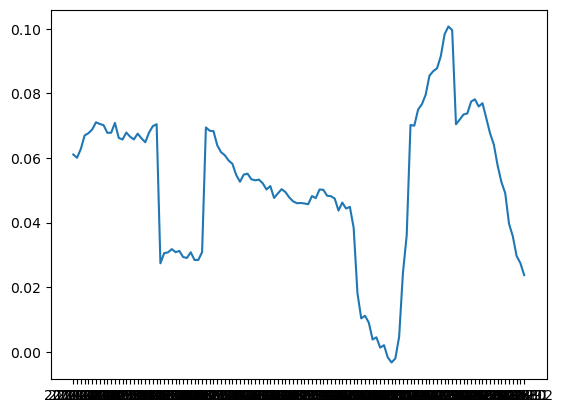

In [147]:
#Lookinga t credit since 2000

import matplotlib.pyplot as plt

mask = df[852:]

plt.plot(mask['Date'], mask['credit_yoy'])


In [148]:
df_bls = pd.read_csv('data/BLS_data.csv')
df_bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2023,December,306.746,3.352123,3.7,157347.0,1.980673,NaN,NaN,...,325.409,2.704844,3.289,-1.996424,139.5,-1.622003,127.596,0.080004,270.725,2.184670
1,1,2023,November,307.051,3.137271,3.7,157014.0,1.854627,NaN,NaN,...,325.172,2.949119,3.500,-9.161692,139.5,-1.483051,127.908,-0.096070,270.202,2.107125
2,2,2023,October,307.671,3.241145,3.8,156832.0,1.907120,NaN,NaN,...,325.731,3.300742,3.782,-5.826693,140.2,-1.751927,126.772,-1.819984,269.779,2.020913
3,3,2023,September,307.789,3.699698,3.8,156667.0,2.039261,NaN,NaN,...,324.704,3.692255,3.988,2.757021,141.0,-1.467505,127.343,-1.915582,269.390,1.930855
4,4,2023,August,307.026,3.665112,3.8,156421.0,2.048525,NaN,NaN,...,324.100,4.254121,3.955,-3.560107,140.3,-2.973721,128.323,-0.803172,269.199,2.318519


In [151]:
#Loading Aaran's full dataset to combine with credit yoy from df
df_first = pd.read_csv('data/all_monthly_data_clean.csv')
df_first.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
0,2019,December,331345000.0,3.6,2.976407,2.285130,3.226840,3.437022,4.619287,1.807531,...,3.510450e+11,1.141310e+11,2.228563e+12,1.445443e+12,3.788137e+12,.,3.720,NaN,NaN,NaN
1,2019,November,331213000.0,3.6,3.316327,2.051278,3.315695,-0.590061,4.272018,2.000165,...,3.493480e+11,1.144740e+11,2.222931e+12,1.445227e+12,3.782632e+12,14.87,3.695,NaN,NaN,NaN
2,2019,October,331066000.0,3.6,3.142126,1.764043,3.355015,-4.166427,4.292580,2.073456,...,3.488320e+11,1.147100e+11,2.209687e+12,1.438320e+12,3.762717e+12,.,3.688,2.93,1.46,760.36
3,2019,September,330904000.0,3.5,3.111274,1.711305,3.506051,-4.751840,3.418900,1.788571,...,3.494810e+11,1.148640e+11,2.194830e+12,1.429200e+12,3.738894e+12,.,3.605,NaN,NaN,NaN
4,2019,August,330729000.0,3.6,3.419118,1.749780,3.352060,-4.389285,3.384868,1.705389,...,3.506330e+11,1.149560e+11,2.197049e+12,1.426682e+12,3.738687e+12,15.1,3.616,NaN,NaN,NaN


In [152]:
df_first['date'] = pd.to_datetime(df_first['month']+' '+df_first['year'].astype(str))

df_first.set_index('date', inplace=True)
df_first.sort_index(inplace=True)




In [153]:
df_first.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000,January,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2100,NaN,NaN,NaN
2000-02-01,2000,February,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.55,8.3250,NaN,NaN,NaN
2000-03-01,2000,March,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2400,NaN,NaN,NaN
2000-04-01,2000,April,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.1525,NaN,NaN,NaN
2000-05-01,2000,May,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.60,8.5150,NaN,NaN,NaN


In [155]:
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df.reset_index(inplace=True, drop = True)
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550.0,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276.0,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099.0,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065.0,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967.0,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df = df[684:]
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
684,2000-01,5.81,8.15,4.26,1538520.18,614846.55,923673.63,1551875.76,453836.77,899329.59,...,ND,7.33,53.77,91.38,20503.45,NaN,NaN,NaN,1441928.63,0.076250
685,2000-02,8.32,4.85,10.63,1549185.29,617332.56,931852.73,1549328.50,450102.48,897668.62,...,14.3,7.44,53.63,91.89,20206.21,NaN,NaN,NaN,1440155.38,0.075806
686,2000-03,9.5,10.07,9.13,1561450.69,622510.97,938939.72,1553765.00,458913.84,900657.87,...,ND,6.92,53.98,92.91,20394.79,NaN,NaN,NaN,1442398.17,0.077209
687,2000-04,6.98,6.22,7.48,1570527.74,625735.94,944791.8,1564206.50,461817.66,903935.87,...,ND,6.67,54.44,93.29,20541.56,NaN,NaN,NaN,1448809.97,0.079649
688,2000-05,9.92,11.74,8.71,1583507.92,631857.15,951650.78,1576800.03,464093.37,909691.2,...,14.76,6.72,54.37,92.88,20620.66,NaN,NaN,NaN,1459939.12,0.080045


In [158]:
df.reset_index(inplace=True)
df.head()

,index,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,684,2000-01,5.81,8.15,4.26,1538520.18,614846.55,923673.63,1551875.76,453836.77,...,ND,7.33,53.77,91.38,20503.45,NaN,NaN,NaN,1441928.63,0.076250
1,685,2000-02,8.32,4.85,10.63,1549185.29,617332.56,931852.73,1549328.50,450102.48,...,14.3,7.44,53.63,91.89,20206.21,NaN,NaN,NaN,1440155.38,0.075806
2,686,2000-03,9.5,10.07,9.13,1561450.69,622510.97,938939.72,1553765.00,458913.84,...,ND,6.92,53.98,92.91,20394.79,NaN,NaN,NaN,1442398.17,0.077209
3,687,2000-04,6.98,6.22,7.48,1570527.74,625735.94,944791.8,1564206.50,461817.66,...,ND,6.67,54.44,93.29,20541.56,NaN,NaN,NaN,1448809.97,0.079649
4,688,2000-05,9.92,11.74,8.71,1583507.92,631857.15,951650.78,1576800.03,464093.37,...,14.76,6.72,54.37,92.88,20620.66,NaN,NaN,NaN,1459939.12,0.080045


In [159]:
df = df.drop(columns = 'index')
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
0,2000-01,5.81,8.15,4.26,1538520.18,614846.55,923673.63,1551875.76,453836.77,899329.59,...,ND,7.33,53.77,91.38,20503.45,NaN,NaN,NaN,1441928.63,0.076250
1,2000-02,8.32,4.85,10.63,1549185.29,617332.56,931852.73,1549328.50,450102.48,897668.62,...,14.3,7.44,53.63,91.89,20206.21,NaN,NaN,NaN,1440155.38,0.075806
2,2000-03,9.5,10.07,9.13,1561450.69,622510.97,938939.72,1553765.00,458913.84,900657.87,...,ND,6.92,53.98,92.91,20394.79,NaN,NaN,NaN,1442398.17,0.077209
3,2000-04,6.98,6.22,7.48,1570527.74,625735.94,944791.8,1564206.50,461817.66,903935.87,...,ND,6.67,54.44,93.29,20541.56,NaN,NaN,NaN,1448809.97,0.079649
4,2000-05,9.92,11.74,8.71,1583507.92,631857.15,951650.78,1576800.03,464093.37,909691.2,...,14.76,6.72,54.37,92.88,20620.66,NaN,NaN,NaN,1459939.12,0.080045


In [160]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace=True)
df.head()

,Date,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000-01-01,5.81,8.15,4.26,1538520.18,614846.55,923673.63,1551875.76,453836.77,899329.59,...,ND,7.33,53.77,91.38,20503.45,NaN,NaN,NaN,1441928.63,0.076250
2000-02-01,2000-02-01,8.32,4.85,10.63,1549185.29,617332.56,931852.73,1549328.50,450102.48,897668.62,...,14.3,7.44,53.63,91.89,20206.21,NaN,NaN,NaN,1440155.38,0.075806
2000-03-01,2000-03-01,9.5,10.07,9.13,1561450.69,622510.97,938939.72,1553765.00,458913.84,900657.87,...,ND,6.92,53.98,92.91,20394.79,NaN,NaN,NaN,1442398.17,0.077209
2000-04-01,2000-04-01,6.98,6.22,7.48,1570527.74,625735.94,944791.8,1564206.50,461817.66,903935.87,...,ND,6.67,54.44,93.29,20541.56,NaN,NaN,NaN,1448809.97,0.079649
2000-05-01,2000-05-01,9.92,11.74,8.71,1583507.92,631857.15,951650.78,1576800.03,464093.37,909691.2,...,14.76,6.72,54.37,92.88,20620.66,NaN,NaN,NaN,1459939.12,0.080045


In [161]:
df = df.drop(columns = 'Date')
df.head()

,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level","Total consumer credit owned by depository institutions, not seasonally adjusted level",...,"Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted",credit_12m_ago,credit_yoy
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,5.81,8.15,4.26,1538520.18,614846.55,923673.63,1551875.76,453836.77,899329.59,567643.81,...,ND,7.33,53.77,91.38,20503.45,NaN,NaN,NaN,1441928.63,0.076250
2000-02-01,8.32,4.85,10.63,1549185.29,617332.56,931852.73,1549328.50,450102.48,897668.62,567566.23,...,14.3,7.44,53.63,91.89,20206.21,NaN,NaN,NaN,1440155.38,0.075806
2000-03-01,9.5,10.07,9.13,1561450.69,622510.97,938939.72,1553765.00,458913.84,900657.87,564838.96,...,ND,6.92,53.98,92.91,20394.79,NaN,NaN,NaN,1442398.17,0.077209
2000-04-01,6.98,6.22,7.48,1570527.74,625735.94,944791.8,1564206.50,461817.66,903935.87,568160.77,...,ND,6.67,54.44,93.29,20541.56,NaN,NaN,NaN,1448809.97,0.079649
2000-05-01,9.92,11.74,8.71,1583507.92,631857.15,951650.78,1576800.03,464093.37,909691.2,571218.54,...,14.76,6.72,54.37,92.88,20620.66,NaN,NaN,NaN,1459939.12,0.080045


In [162]:
df_first.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000,January,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2100,NaN,NaN,NaN
2000-02-01,2000,February,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.55,8.3250,NaN,NaN,NaN
2000-03-01,2000,March,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2400,NaN,NaN,NaN
2000-04-01,2000,April,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.1525,NaN,NaN,NaN
2000-05-01,2000,May,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.60,8.5150,NaN,NaN,NaN


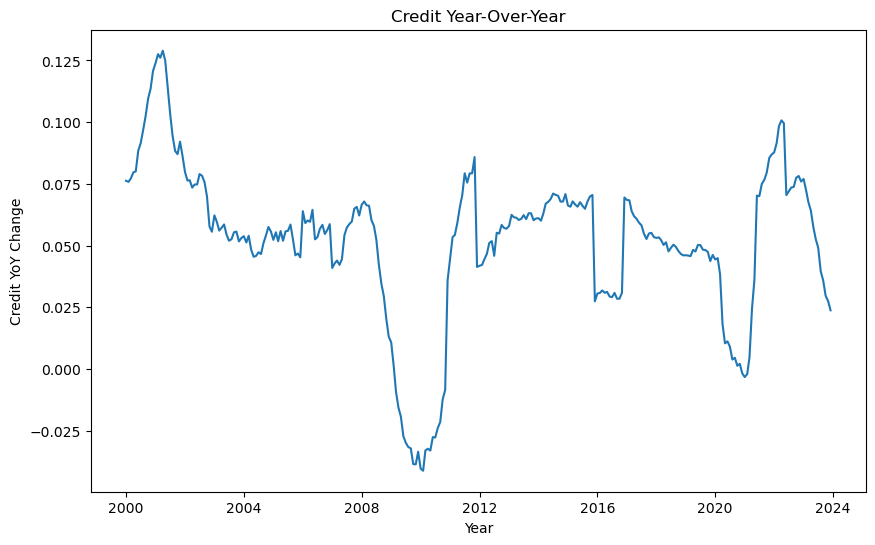

In [163]:
plt.figure(figsize=(10, 6)) 
plt.title('Credit Year-Over-Year')
plt.xlabel('Year')
plt.ylabel('Credit YoY Change')
plt.plot(df['credit_yoy'])


plt.show()


In [164]:
df_first.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,2000,January,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2100,NaN,NaN,NaN
2000-02-01,2000,February,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.55,8.3250,NaN,NaN,NaN
2000-03-01,2000,March,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.2400,NaN,NaN,NaN
2000-04-01,2000,April,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,.,8.1525,NaN,NaN,NaN
2000-05-01,2000,May,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.60,8.5150,NaN,NaN,NaN


In [165]:
#Combining credit with original Aaran's df
df_first['credit_yoy'] = df['credit_yoy']


In [166]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2000-01-01 to 2023-12-01
Data columns (total 48 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   year                                                             288 non-null    int64  
 1   month                                                            288 non-null    object 
 2   population                                                       276 non-null    float64
 3   unemployment_rate                                                288 non-null    float64
 4   hourly_earnings_yoy                                              202 non-null    float64
 5   cpi_yoy                                                          276 non-null    float64
 6   shelter_yoy                                                      276 non-null    float64
 7   energy_yoy               

In [167]:
#removing 2001
df_first_cut = df_first[12:]

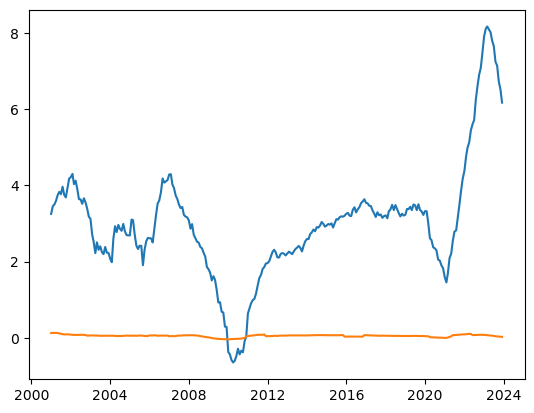

In [168]:
plt.plot(df_first_cut['shelter_yoy'])
plt.plot(df_first_cut['credit_yoy'])
plt.show()


In [169]:
df_first_cut.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,0.123914
2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,0.127571
2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,0.126119
2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,0.128958
2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,0.124989


In [170]:
#multiplyhing credit by 100
df_first_cut['credit_yoy'] = 100* df_first_cut['credit_yoy']

/var/folders/2x/dbnt23xd6xv5bzc9snn0s0tm0000gn/T/ipykernel_21344/2852002111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_cut['credit_yoy'] = 100* df_first_cut['credit_yoy']


In [171]:
df_first_cut.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364
2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135
2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905
2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804
2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904


In [174]:
df_first_cut.to_csv('Master_data.csv')

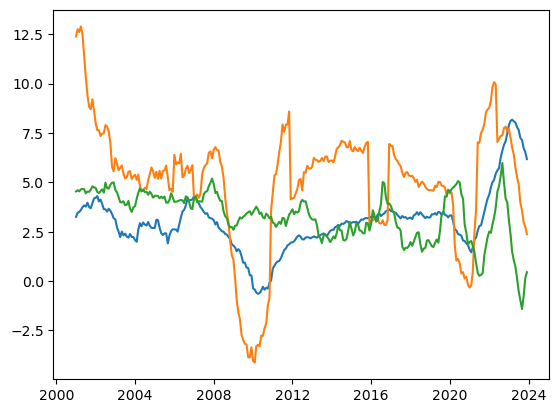

In [175]:
plt.plot(df_first_cut['shelter_yoy'])
plt.plot(df_first_cut['credit_yoy'])
plt.plot(df_first_cut['medical_care_yoy'])
plt.show()

In [176]:
df_first_cut.corr()['credit_yoy'].sort_values(ascending=False)

credit_yoy                                                         1.000000
shelter_yoy                                                        0.520146
cpi_yoy                                                            0.448303
food_yoy                                                           0.320199
energy_yoy                                                         0.299519
mortgage_rate_30_yr                                                0.248460
gasoline_yoy                                                       0.202741
all_less_food_&_shelter_yoy                                        0.184390
imports_yoy                                                        0.164761
tax_personal_current                                               0.136099
cc_balance_total_billions                                          0.111787
hourly_earnings_yoy                                                0.108193
medical_care_yoy                                                   0.103553
new_&_used_v

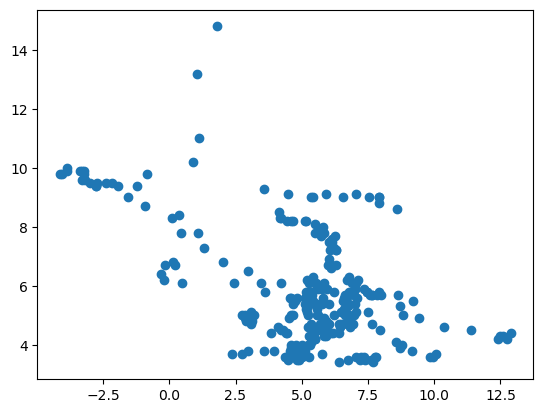

In [177]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['unemployment_rate'])

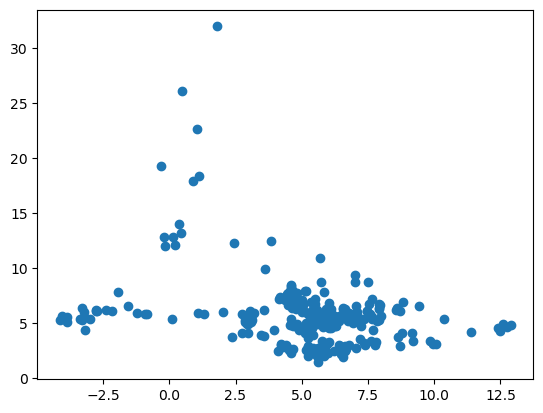

In [178]:
plt.scatter(df_first_cut['credit_yoy'], df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

<AxesSubplot:xlabel='credit_yoy', ylabel='Count'>

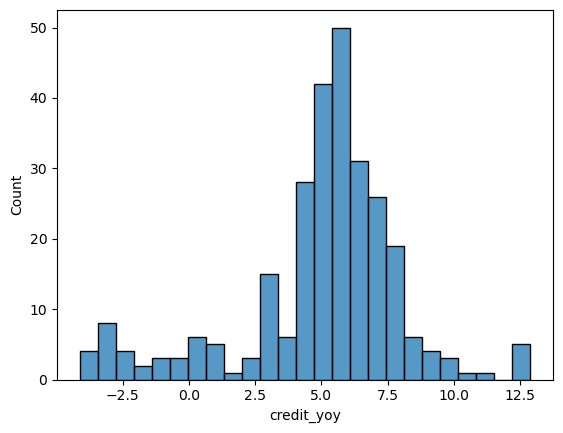

In [179]:
sns.histplot(df_first_cut['credit_yoy'])

<AxesSubplot:xlabel='personal_saving_as_a_percentage_of_disposable_personal_income', ylabel='Count'>

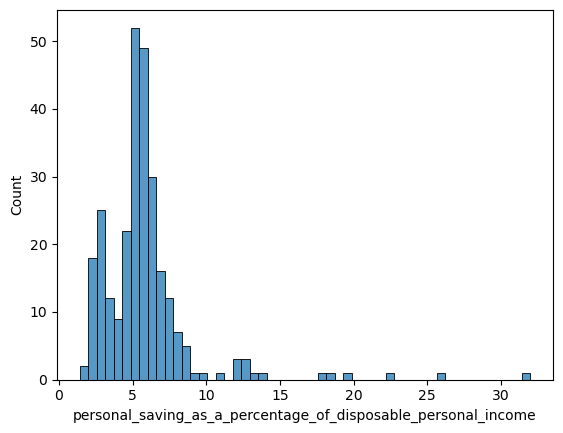

In [180]:
sns.histplot(df_first_cut['personal_saving_as_a_percentage_of_disposable_personal_income'])

In [181]:
df_first_cut.columns

Index(['year', 'month', 'population', 'unemployment_rate',
       'hourly_earnings_yoy', 'cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'imports_yoy',
       'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',
       'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income',
      

In [182]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'total_personal_income', 'total_employee_compensation',
       'wages_and_salaries_all', 'wages_salaries_private_employees',
       'wages_salaries_government_employees', 'rental_income_(capital_consumption_adjusted)', 'credit_yoy']
    

In [183]:
df1 = df_first_cut[features]

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/steve

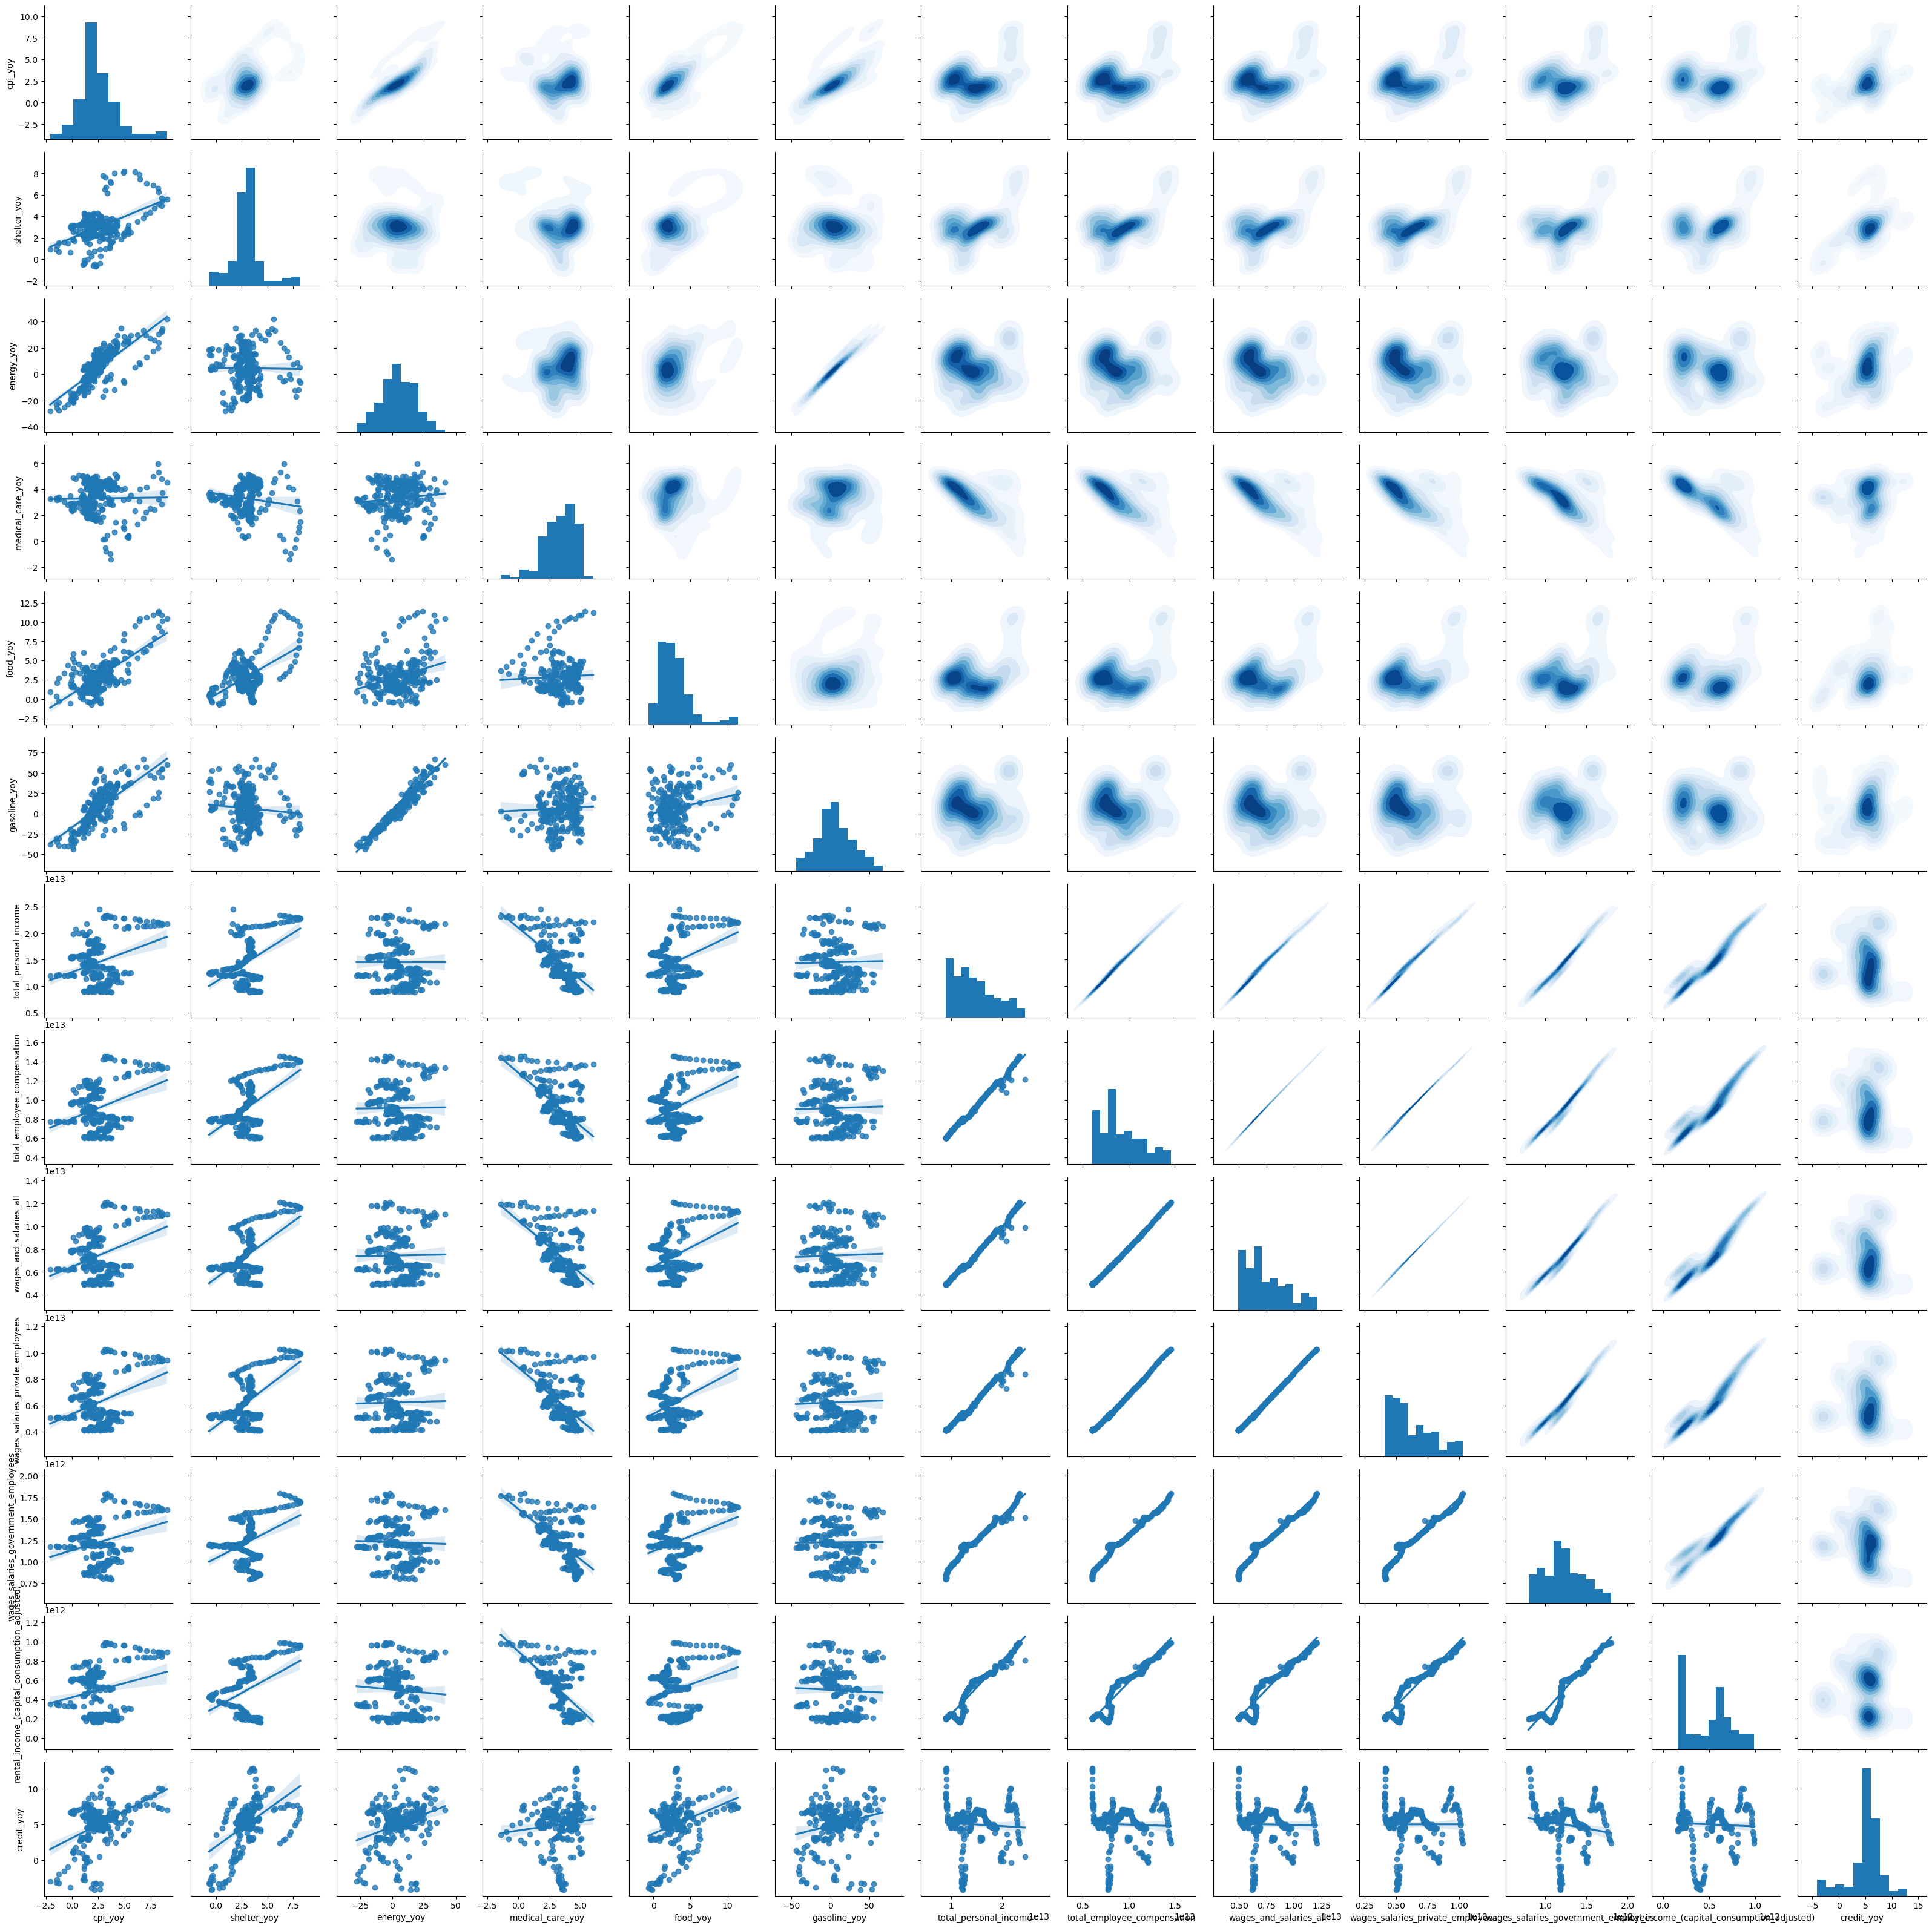

In [184]:
g = sns.PairGrid(df1)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

<AxesSubplot:>

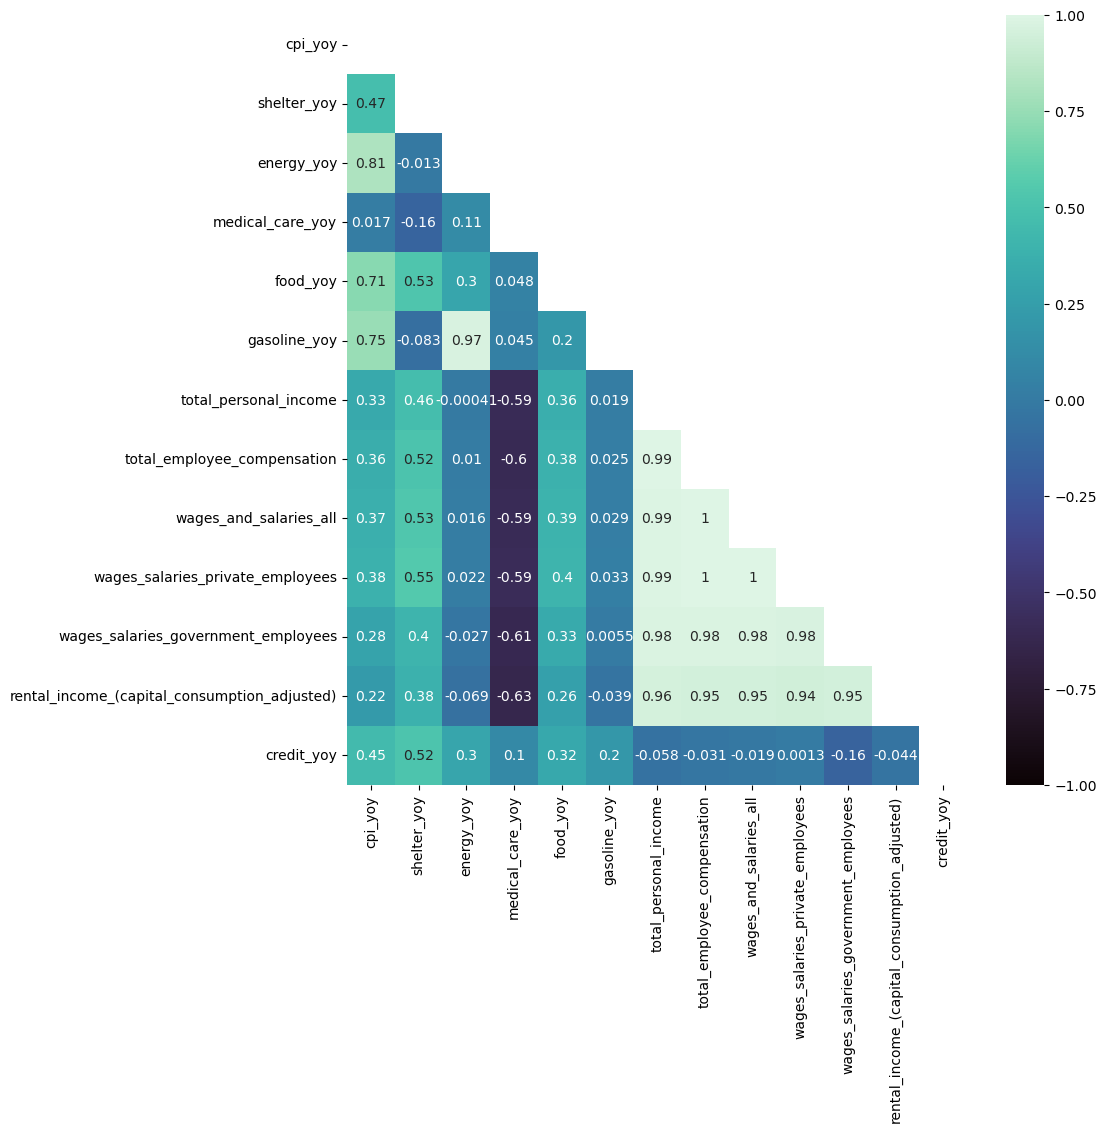

In [185]:
import numpy as np

plt.figure(figsize=(10,10))

corr = df1.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, annot = True, fmt='.2g', cmap = 'mako', vmax =1, vmin = -1 )

In [186]:
df_first_cut.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,...,5.118800e+10,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364
2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,...,5.152400e+10,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135
2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,...,5.189600e+10,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905
2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,...,5.212400e+10,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804
2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,...,5.246000e+10,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904


In [ ]:
#Build mortgage costs
# add homelessness, foreclosure data?
#Look for polynomial, log data

